In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#reference:  https://matplotlib.org/stable/users/explain/toolkits/mplot3d.html
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

#custom modules
import summarize as s
import wrangle as w
import wrangle_mall as wm
import wrangle_zillow as wz
from wrangle import train_val_test, acquire_mall

# Exercises

1. Clustering with the Iris Dataset

> Using this lesson as a guide, perform clustering on the iris dataset.

a. Choose features other than the ones used in the lesson.  

b. Visualize the results of your clustering.  

c. Use the elbow method to visually select a good value for k.  

d. Repeat the clustering, this time with 3 different features.  

In [2]:
iris = data('iris')
s.summarize(iris)

Shape of Data: 
(150, 5)
Info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None
Descriptions:
|              |   count |    mean |      std |   min |   25% |   50% |   75% |   max |
|:-------------|--------:|--------:|---------:|------:|------:|------:|------:|------:|
| Sepal.Length |     150 | 5.84333 | 0.828066 |   4.3 |   5.1 |  5.8  |   6.4 |   7.9 |
| Sepal.Width  |     150 | 3.05733 | 0.435866 |   2   |   2.8 |  3    |   3.3 |   4.4 |
| Petal.Length |     150 | 3.758   | 1.7653   |   1   |   1.6 |  4.35 |   5.1 |   6.9 |
| Petal.Width  |     150 | 1.19933 | 0.762238 |   0.

In [3]:
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


In [4]:
# clean up the column names:
iris.columns = [
    col.lower().replace('.','_') for col in iris.columns
]

In [5]:
train, val, test = train_val_test(iris)

In [6]:
# clean up the column names:
train.columns = [
    col.lower().replace('.','_') for col in train.columns
]

In [7]:
train.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
X = train[['petal_width', 'sepal_width']]

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1,
       2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2], dtype=int32)

In [10]:
train['cluster'] = kmeans.predict(X)

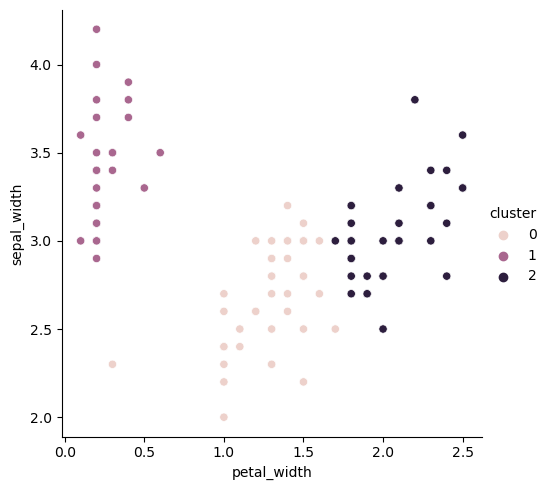

In [11]:
sns.relplot(data=train, x='petal_width', y='sepal_width', hue='cluster')
plt.show()

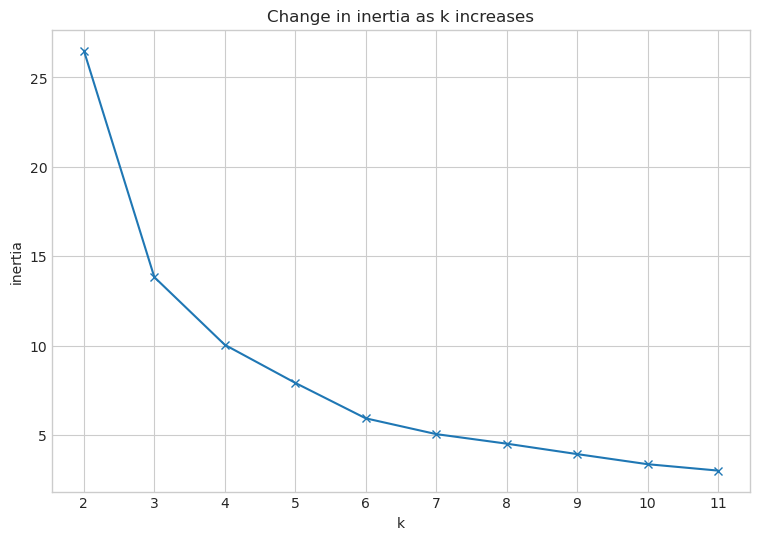

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## Clustering now with 3 different features

In [13]:
X = train[['petal_width', 'sepal_width', 'sepal_length']]

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0,
       1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2], dtype=int32)

In [15]:
X['cluster'] = kmeans.predict(X)

In [16]:
n_clusters = 3  # You can choose any suitable number of clusters
labels = kmeans.labels_

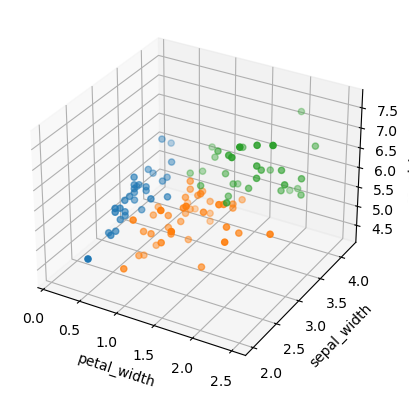

In [17]:
# reference: https://matplotlib.org/stable/users/explain/toolkits/mplot3d.html
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot each cluster with a different color
for cluster in range(n_clusters):
    cluster_data = X[X['cluster'] == cluster]  # Filter data for the current cluster
    ax.scatter(cluster_data['petal_width'], cluster_data['sepal_width'], cluster_data['sepal_length'], label=f'Cluster {cluster}')

ax.set_xlabel('petal_width')
ax.set_ylabel('sepal_width')
ax.set_zlabel('sepal_length')
plt.show()

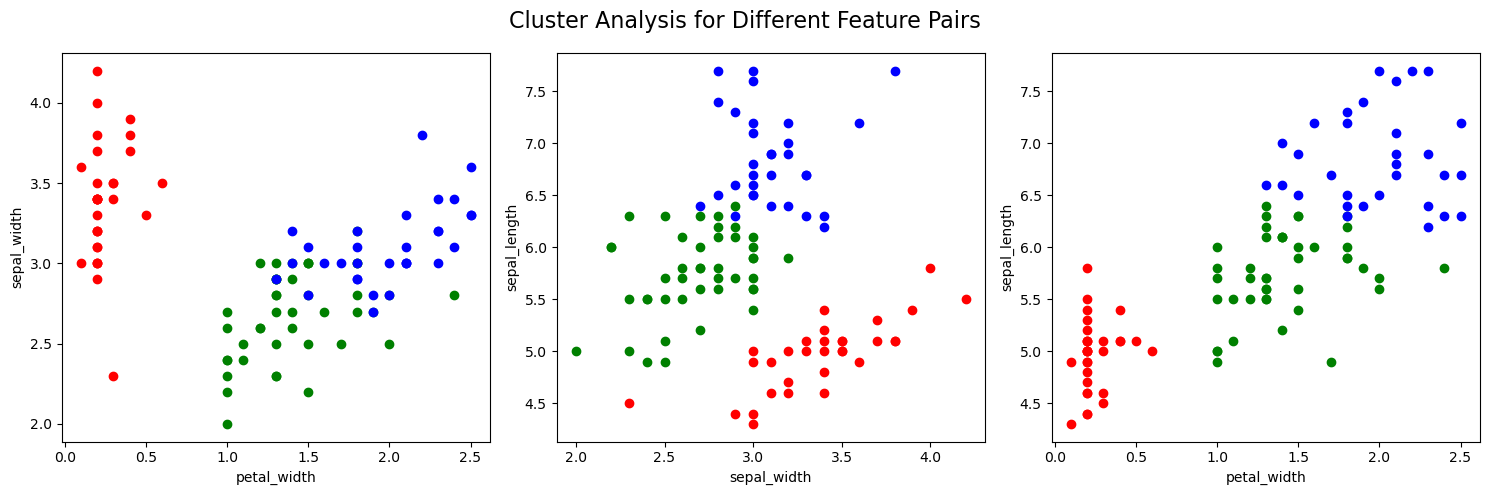

In [18]:
# Create subplots for 2D scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create scatter plots for each feature pair
feature_pairs = [('petal_width', 'sepal_width'), ('sepal_width', 'sepal_length'), ('petal_width', 'sepal_length')]
cluster_colors = ['r', 'g', 'b']

for i, (x_feature, y_feature) in enumerate(feature_pairs):
    for cluster in range(n_clusters):
        cluster_data = X[X['cluster'] == cluster]
        axes[i].scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster}', c=cluster_colors[cluster])

    axes[i].set_xlabel(x_feature)
    axes[i].set_ylabel(y_feature)

# Add a title to all plots
fig.suptitle("Cluster Analysis for Different Feature Pairs", fontsize=16)
    
plt.tight_layout()
plt.show()

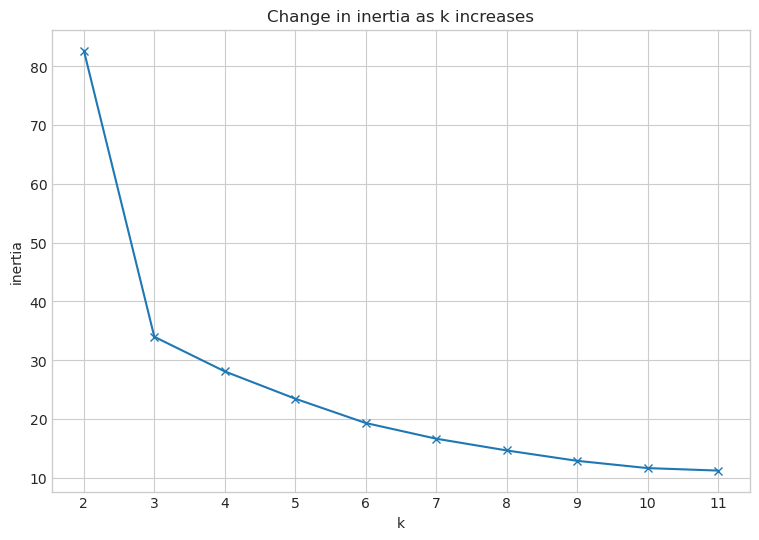

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [20]:
mall = w.acquire_mall()

In [21]:
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
train, val, test = train_val_test(mall)
train.shape, val.shape, test.shape

((140, 5), (30, 5), (30, 5))

In [23]:
train.head(2)

,customer_id,gender,age,annual_income,spending_score
169,170,Male,32,87,63
97,98,Female,27,60,50


In [24]:
train.columns.to_list()

['customer_id', 'gender', 'age', 'annual_income', 'spending_score']

In [25]:
numerical = ['annual_income', 'age', 'spending_score']
categorical = ['gender']
explore_cols = numerical + categorical

In [26]:
X = train[['annual_income', 'age', 'spending_score']]

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([3, 2, 1, 4, 1, 2, 2, 3, 2, 0, 2, 3, 0, 1, 2, 2, 4, 3, 2, 2, 4, 2,
       2, 3, 3, 2, 3, 4, 0, 2, 4, 3, 2, 1, 1, 0, 3, 4, 1, 2, 4, 4, 2, 3,
       2, 0, 4, 2, 2, 2, 0, 4, 0, 3, 2, 3, 2, 4, 3, 4, 4, 2, 3, 0, 1, 1,
       0, 3, 2, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 3, 0, 0, 3, 2, 2, 4, 1, 2,
       2, 2, 0, 3, 2, 4, 1, 2, 3, 3, 1, 2, 3, 0, 3, 3, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 3, 1, 3, 3, 1, 2, 3, 0, 3, 2, 2, 2, 2, 2, 2, 3,
       4, 0, 2, 2, 4, 2, 3, 2], dtype=int32)

In [28]:
X['cluster'] = kmeans.predict(X)

In [29]:
n_clusters = 3  # You can choose any suitable number of clusters
labels = kmeans.labels_

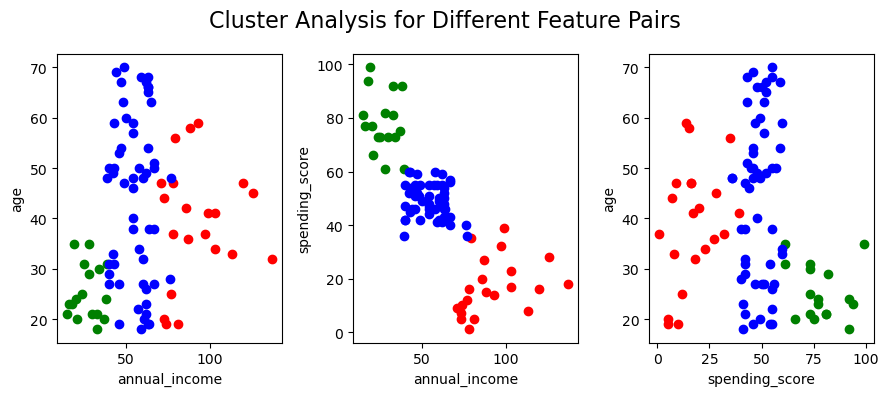

In [30]:

fig, axes = plt.subplots(1, 3, figsize=(9, 4))


feature_pairs = [('annual_income', 'age'), ('annual_income', 'spending_score'), ('spending_score', 'age')]
cluster_colors = ['r', 'g', 'b']

for i, (x_feature, y_feature) in enumerate(feature_pairs):
    for cluster in range(n_clusters):
        cluster_data = X[X['cluster'] == cluster]
        axes[i].scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster}', c=cluster_colors[cluster])

    axes[i].set_xlabel(x_feature)
    axes[i].set_ylabel(y_feature)

# Add a title to all plots
fig.suptitle("Cluster Analysis for Different Feature Pairs", fontsize=16)
    
plt.tight_layout()
plt.show()

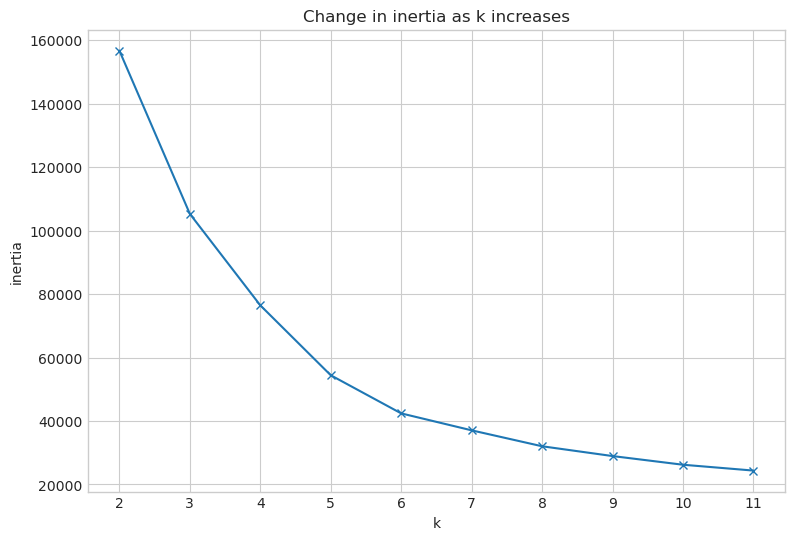

In [31]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

3. How does scaling impact the results of clustering?

**Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.**

In [32]:
train, val, test = wz.wrangle_zillow()

Shape of Data: 
(52319, 68)
Info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquaref

KeyError: 'propertyzoningdesc'

In [ ]:
train.head(2)

In [ ]:
train.columns.to_list()

In [ ]:
X = train[['id',
 'parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'fireplaceflag',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'taxdelinquencyyear',
 'censustractandblock',
 'logerror',
 'buildingclassdesc',
 'id_outliers',
 'parcelid_outliers',
 'airconditioningtypeid_outliers',
 'architecturalstyletypeid_outliers',
 'basementsqft_outliers',
 'bathroomcnt_outliers',
 'bedroomcnt_outliers',
 'buildingclasstypeid_outliers',
 'buildingqualitytypeid_outliers',
 'calculatedbathnbr_outliers',
 'decktypeid_outliers',
 'finishedfloor1squarefeet_outliers',
 'calculatedfinishedsquarefeet_outliers',
 'finishedsquarefeet12_outliers',
 'finishedsquarefeet13_outliers',
 'finishedsquarefeet15_outliers',
 'finishedsquarefeet50_outliers',
 'finishedsquarefeet6_outliers',
 'fips_outliers',
 'fireplacecnt_outliers',
 'fullbathcnt_outliers',
 'garagecarcnt_outliers',
 'garagetotalsqft_outliers',
 'hashottuborspa_outliers',
 'heatingorsystemtypeid_outliers',
 'latitude_outliers',
 'longitude_outliers',
 'lotsizesquarefeet_outliers',
 'poolcnt_outliers',
 'poolsizesum_outliers',
 'pooltypeid10_outliers',
 'pooltypeid2_outliers',
 'pooltypeid7_outliers',
 'propertylandusetypeid_outliers',
 'rawcensustractandblock_outliers',
 'regionidcity_outliers',
 'regionidcounty_outliers',
 'regionidneighborhood_outliers',
 'regionidzip_outliers',
 'roomcnt_outliers',
 'storytypeid_outliers',
 'threequarterbathnbr_outliers',
 'typeconstructiontypeid_outliers',
 'unitcnt_outliers',
 'yardbuildingsqft17_outliers',
 'yardbuildingsqft26_outliers',
 'yearbuilt_outliers',
 'numberofstories_outliers',
 'fireplaceflag_outliers',
 'structuretaxvaluedollarcnt_outliers',
 'taxvaluedollarcnt_outliers',
 'assessmentyear_outliers',
 'landtaxvaluedollarcnt_outliers',
 'taxamount_outliers',
 'taxdelinquencyyear_outliers',
 'censustractandblock_outliers',
 'logerror_outliers',
 'buildingclassdesc_outliers']]

In [ ]:
# from sklearn.impute import SimpleImputer

# # Create an imputer with a strategy (e.g., mean, median, etc.)
# imputer = SimpleImputer(strategy='mean')

# # Fit and transform the imputer on your data
# X = imputer.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

In [ ]:
X['cluster'] = kmeans.predict(X)

# Bonus

1. Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

2. Visualize the data and guess the number and shape of the clusters.

3. Implement the KMeans algorithm on unscaled data and visualize the clusters.

4. Repeat the step above but with scaled data.

5. Write down the takeaways from this exercise.